In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Training Set

In [2]:
# Import training data set
df = pd.read_csv("C:/Users/z011348/Desktop/ML/input/restaurant-revenue-prediction/train.csv",
                low_memory=False,
                parse_dates=["Open Date"])
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [3]:
df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [4]:
df.select_dtypes(['object']).columns

Index(['City', 'City Group', 'Type'], dtype='object')

In [5]:
cols = list(df.select_dtypes(['object']).columns)
cols

['City', 'City Group', 'Type']

In [6]:
df.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [7]:
df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [8]:
df.Type.unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [9]:
df['Open Date']

0     1999-07-17
1     2008-02-14
2     2013-03-09
3     2012-02-02
4     2009-05-09
         ...    
132   2008-06-25
133   2006-10-12
134   2006-07-08
135   2010-10-29
136   2009-09-01
Name: Open Date, Length: 137, dtype: datetime64[ns]

In [10]:
def process_open_date(df_x, open_date):
    df_x["Open Year"] = open_date.dt.year
    df_x["Open Month"] = open_date.dt.month
    df_x["Open Day"] = open_date.dt.day
    return df_x

In [11]:
df_tmp = process_open_date(df, df['Open Date'])
df_tmp

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Year,Open Month,Open Day
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999,7,17
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008,2,14
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013,3,9
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,2008,6,25
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,2006,10,12
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,2006,7,8
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,2010,10,29


In [12]:
df_tmp.drop("Open Date", axis=1, inplace=True)

In [13]:
df_tmp

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Year,Open Month,Open Day
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999,7,17
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008,2,14
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013,3,9
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,2008,6,25
133,133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,2006,10,12
134,134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,2006,7,8
135,135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,2010,10,29


In [14]:
# Check for non numeric/categorical data
df_object = df.select_dtypes('object')
df_object

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL
...,...,...,...
132,Trabzon,Other,FC
133,İzmir,Big Cities,FC
134,Kayseri,Other,FC
135,İstanbul,Big Cities,FC


In [15]:
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

In [16]:
def onehot(df1, df1_object, dataset_type, ohe=None):
    cols = list(df1.select_dtypes(['object']).columns)
    if dataset_type == 'train':
        ohe = OneHotEncoder(handle_unknown='ignore')
        ohe.fit(df1_object)
        codes = ohe.transform(df1_object).toarray()
        joblib.dump(ohe, 'onehotencoder.joblib')
    else:
        codes = ohe.transform(df1_object).toarray()
    #codes = ohe.transform(df_object).toarray()
    feature_names = ohe.get_feature_names(cols)
    df_new = pd.concat([df1.select_dtypes(exclude='object'), 
              pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)
    return df_new

In [17]:
#def ohe(df, df_object, dataset_type):
#    ohe = OneHotEncoder(handle_unknown='ignore')
#    if dataset_type == 'train':
#        ohe.fit(df_object)
#        codes = ohe.transform(df_object).toarray()
#    else:
#        codes = ohe.transform(df_object).toarray()
#    #codes = ohe.transform(df_object).toarray()
#    feature_names = ohe.get_feature_names(cols)
#    df_new = pd.concat([df_tmp.select_dtypes(exclude='object'), 
#              pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)
#    return df_new

In [18]:
#df_new = ohe(df_tmp, df_object, 'train')
df_new = onehot(df_tmp, df_object, 'train')
df_new

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Year,Open Month,Open Day,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999,7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008,2,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013,3,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,2008,6,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
133,133,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,2006,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
134,134,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,2006,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
135,135,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,2010,10,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [19]:
df_new = df_new.drop('Id', axis=1)

In [20]:
df_new

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Year,Open Month,Open Day,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999,7,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008,2,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013,3,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,2008,6,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,2006,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,2006,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,2010,10,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [21]:
# Split into X and y (on train set)
X_train, y_train = df_new.drop("revenue", axis=1).values, df_new["revenue"].values

In [22]:
X_train.shape, y_train.shape

((137, 79), (137,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
def minmaxscaler(df1, dataset_type, scaler=None):
    if dataset_type == 'train':
        scaler = MinMaxScaler()
        df1 = scaler.fit_transform(df1)
        joblib.dump(scaler, 'minmaxscaler.joblib')
    else:
        df1 = scaler.transform(df1)
    return df1

In [25]:
#def minmaxscaler(df1, dataset_type):
#    scaler = MinMaxScaler()
#    if dataset_type == 'train':
#        df1 = scaler.fit_transform(df1)
#    else:
#        df1 = scaler.transform(df1)
#    return df1

In [26]:
df_train = minmaxscaler(X_train, 'train')
df_train[0]

array([0.27272727, 0.61538462, 0.53333333, 0.22222222, 0.14285714,
       0.11111111, 0.44444444, 0.33333333, 0.16666667, 0.16666667,
       0.22222222, 0.375     , 0.44444444, 0.06666667, 0.2       ,
       0.13333333, 0.13333333, 0.33333333, 0.16666667, 0.21428571,
       0.        , 0.5       , 0.08333333, 0.1       , 0.1       ,
       0.08      , 0.32      , 0.08695652, 0.4       , 0.2       ,
       0.2       , 0.16      , 0.83333333, 0.20833333, 0.26666667,
       0.15      , 0.5       , 0.16666667, 0.54545455, 0.53333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.     

In [27]:
# Apply models
from sklearn.ensemble import GradientBoostingRegressor
# Import Ridge from sklearn's RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
# Import Linear regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [28]:
def show_scores(model):
    train_pred = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Training MSE" : mean_squared_error(y_train, train_pred),
              "Training RMSE" : np.sqrt(mean_squared_error(y_train, train_pred)),
              "Training R^2": r2_score(y_train, train_pred)
              }
    return scores

In [29]:
#RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
show_scores(rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Training MAE': 661647.8335766422,
 'Training MSE': 1177816478234.2837,
 'Training RMSE': 1085272.5363862682,
 'Training R^2': 0.8212099166858269}

In [31]:
train_preds_rf = rf.predict(X_train)
train_preds_rf

array([ 5461198. ,  6642970.2,  2189106.9,  2751627.2,  4304147.2,
        4894101.5,  5161783.8,  4614887.9,  4340277.8,  5633374.7,
        3687050.8,  5082876.5,  2190844.2,  5212695. ,  2651145.8,
        3532687.4, 15833045.7,  6291090.1,  5676883.5,  2967755.8,
        4850233. ,  2970791. ,  4228805.6,  2855933.5,  7420087.7,
        4407523. ,  2972519.4,  4872999.1,  7886728.7,  3382928.5,
        3387869.2,  3787762.6,  3209536.8,  2647661.6,  4341437.2,
        6035288.8,  3535492.5,  3184381.1,  4932200.7,  4048656.5,
        7147262.5,  4689472.9,  5146963.6,  2743961.4,  4254206.1,
        3891695.1,  4701666. ,  7649612.1,  6199073. ,  7143618.4,
        2857427. ,  3290975.1,  2265940.9,  5705220. ,  4231794.4,
        6855065.4,  3203906.1,  3212156.4,  3496873.7,  3786203.5,
        3324694.4,  4994354.4,  5242097.2,  2546443.5,  2892746.1,
        2370402.8,  2719793.2,  5802539.9,  4455392.1,  4621201.7,
        3918996.7,  3724105. ,  3434107.6,  4947144.2,  575713

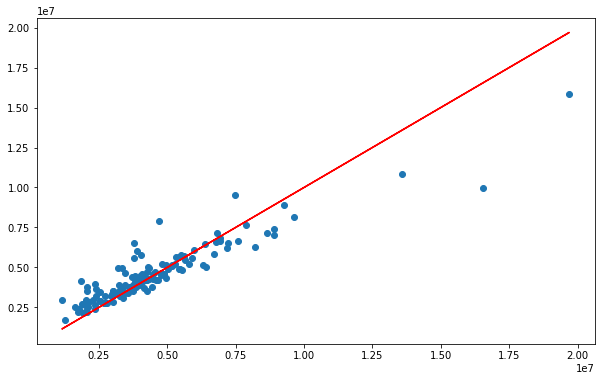

In [32]:
# Lets plot to see visually
plt.figure(figsize=(10,6))
plt.scatter(y_train, train_preds_rf)
plt.plot(y_train, y_train, 'r');  # lineplot

In [65]:
df2 = pd.DataFrame()
df2['y_train'] = y_train
df2['train_preds'] = train_preds_rf
df2

,y_train,train_preds
0,5653753.0,5461198.0
1,6923131.0,6642970.2
2,2055379.0,2189106.9
3,2675511.0,2751627.2
4,4316715.0,4304147.2
...,...,...
132,5787594.0,5214641.0
133,9262754.0,8880901.3
134,2544857.0,2891011.4
135,7217634.0,6513114.1


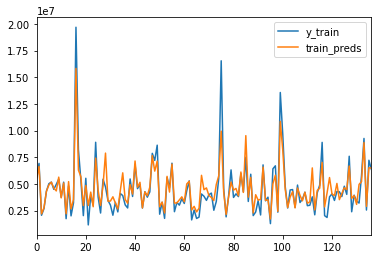

In [66]:
df2.plot();

In [33]:
#GradientBoostingRegressor

In [34]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
show_scores(gb)

{'Training MAE': 448347.45232731645,
 'Training MSE': 377181206677.0436,
 'Training RMSE': 614150.8012508358,
 'Training R^2': 0.9427446799968144}

In [35]:
train_preds = gb.predict(X_train)
train_preds

array([ 5262016.83880221,  5857277.99574775,  1847574.58629888,
        2910764.57400343,  3841335.71547725,  5128554.52758034,
        5112522.9708345 ,  4529662.07511034,  4481840.2643792 ,
        5352985.80769526,  3462623.34810008,  4779569.22311125,
        1635421.76513865,  5000784.36298971,  2586614.43956451,
        3472870.79863756, 16950086.70968227,  7009400.38144968,
        4904162.30189788,  2832441.19948312,  5170745.03290881,
        1688493.79273479,  4416597.78683908,  3164969.30644515,
        8266878.09171923,  4322452.00143659,  2855213.6243358 ,
        5409798.02451941,  5058562.90855676,  3180186.61068175,
        2843627.45396986,  2281054.04578584,  3084962.46816507,
        2261463.2402227 ,  4153658.18613995,  3954386.07980485,
        3468421.7611964 ,  2954996.97099696,  6030603.52368159,
        4438532.99277433,  6394355.93466127,  4886658.12751134,
        4944678.57719547,  2770106.32628073,  3835494.04984107,
        3874015.10696927,  4145050.85977

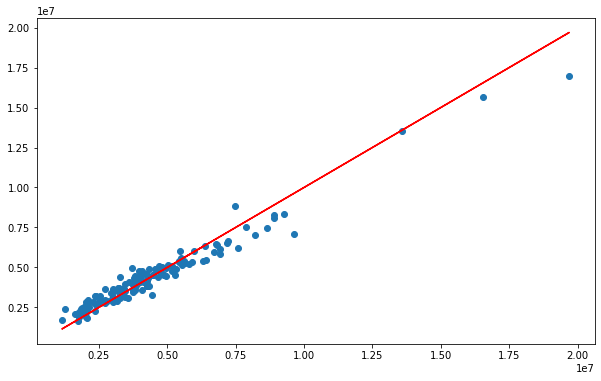

In [36]:
# Lets plot to see visually
plt.figure(figsize=(10,6))
plt.scatter(y_train, train_preds)
plt.plot(y_train, y_train, 'r');  # lineplot

In [59]:
df2 = pd.DataFrame()
df2['y_train'] = y_train
df2['train_preds'] = train_preds
df2

,y_train,train_preds
0,5653753.0,5.262017e+06
1,6923131.0,5.857278e+06
2,2055379.0,1.847575e+06
3,2675511.0,2.910765e+06
4,4316715.0,3.841336e+06
...,...,...
132,5787594.0,5.206357e+06
133,9262754.0,8.343455e+06
134,2544857.0,3.206250e+06
135,7217634.0,6.657763e+06


<Figure size 720x432 with 0 Axes>

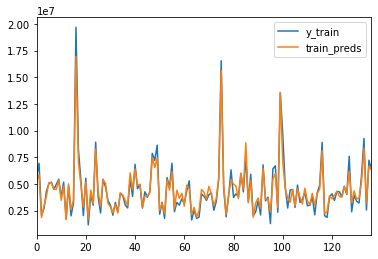

In [62]:
plt.figure(figsize=(10,6))
df2.plot();

In [37]:
# LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
show_scores(lr)

{'Training MAE': 1131947.223256401,
 'Training MSE': 3105736472943.906,
 'Training RMSE': 1762309.9820814459,
 'Training R^2': 0.5285556850232358}

# Test set

In [39]:
# Import test data set
df_test = pd.read_csv("C:/Users/z011348/Desktop/ML/input/restaurant-revenue-prediction/test.csv",
                low_memory=False,
                parse_dates=["Open Date"])
df_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


In [40]:
df_test1 = process_open_date(df_test, df_test['Open Date'])
df_test1

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Open Year,Open Month,Open Day
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,22
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,18
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013,10,30
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013,5,6
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,1,5
99996,99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,7,18
99997,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,12,29
99998,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,10,12


In [41]:
#df_test["Open Year"] = df_test['Open Date'].dt.year

In [42]:
# Check for non numeric/categorical data
df_test_object = df_test.select_dtypes('object')
df_test_object

,City,City Group,Type
0,Niğde,Other,FC
1,Konya,Other,IL
2,Ankara,Big Cities,FC
3,Kocaeli,Other,IL
4,Afyonkarahisar,Other,FC
...,...,...,...
99995,Antalya,Other,FC
99996,Niğde,Other,IL
99997,İstanbul,Big Cities,IL
99998,İstanbul,Big Cities,FC


In [43]:
ohe = joblib.load('onehotencoder.joblib')

In [44]:
df_test = onehot(df_test, df_test_object, 'test', ohe)
df_test

,Id,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Open Year,Open Month,Open Day,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,2011-01-22,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,2011-03-18,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,2013-10-30,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013,10,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,2013-05-06,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,4,2013-07-31,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013,7,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2000-01-05,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
99996,99996,2011-07-18,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,7,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
99997,99997,2012-12-29,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
99998,99998,2013-10-12,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [45]:
df_test = df_test.drop(["Id", "Open Date"], axis=1)

In [46]:
df_test

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Open Year,Open Month,Open Day,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013,10,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013,7,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,7,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,12,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [47]:
df_test.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Open Year', 'Open Month',
       'Open Day', 'City_Adana', 'City_Afyonkarahisar', 'City_Amasya',
       'City_Ankara', 'City_Antalya', 'City_Aydın', 'City_Balıkesir',
       'City_Bolu', 'City_Bursa', 'City_Denizli', 'City_Diyarbakır',
       'City_Edirne', 'City_Elazığ', 'City_Eskişehir', 'City_Gaziantep',
       'City_Isparta', 'City_Karabük', 'City_Kastamonu', 'City_Kayseri',
       'City_Kocaeli', 'City_Konya', 'City_Kütahya', 'City_Kırklareli',
       'City_Muğla', 'City_Osmaniye', 'City_Sakarya', 'City_Samsun',
       'City_Tekirdağ', 'City_Tokat', 'City_Trabzon', 'City_Uşak',
       'City_İstanbul', 'City_İzmir', 'City_Şanlıurfa',
       'City Group_Big Cities', 'City Group_Other', 'Type_DT', 'Type_FC',
 

In [48]:
scaler = joblib.load('minmaxscaler.joblib')

In [49]:
df_test = minmaxscaler(df_test, 'test', scaler)
df_test[0]

array([0.        , 0.46153846, 0.53333333, 0.22222222, 0.        ,
       0.11111111, 0.44444444, 0.33333333, 0.16666667, 0.16666667,
       0.44444444, 0.125     , 0.22222222, 0.        , 0.        ,
       0.        , 0.13333333, 0.        , 0.16666667, 0.28571429,
       0.14285714, 0.        , 0.125     , 0.        , 0.        ,
       0.        , 0.        , 0.08695652, 0.4       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83333333, 0.        , 0.7       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Prediction

In [50]:
# GradientBoostingRegressor is giving better metrics than others, hence we can use it for our test set predictions 
test_preds = gb.predict(df_test)
test_preds

array([14215600.05995834, 11730790.28019721, 11979568.02298792, ...,
       17719944.49994765, 13910832.82010955, 17719944.49994765])

In [51]:
# how do we check mean_absolute_error is correct or not?

In [52]:
# mean absolute error/mean * 100

In [53]:
df['revenue'].mean()

4453532.613138686

In [54]:
448347.45232731645/4453532.613138686 * 100

10.06723181962594

In [55]:
# 10% variation in the price (as per mean absolute error)

In [56]:
df_pred = pd.DataFrame()
df_pred["Id"] = df_test1['Id']
revenue_prediction = pd.DataFrame(test_preds).astype('int64')
df_pred["revenue_preds"] = revenue_prediction
df_pred

,Id,revenue_preds
0,0,14215600
1,1,11730790
2,2,11979568
3,3,12499899
4,4,14715748
...,...,...
99995,99995,14215600
99996,99996,12499899
99997,99997,17719944
99998,99998,13910832
